In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mutual_info_score
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# from scipy.stats import ttest_ind

import spacy

In [42]:
df = pd.read_csv('../data/raw/engagements.csv')
df.head()

,timestamp,media_id,media_caption,comment_text
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️


In [44]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.2 MB/s  0:00:025.2 MB/s eta 0:00:0101
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def extract_pos_tags(text, nlp_model):
    """
    Extract parts of speech tags from text using spaCy.
    Returns a list of (token, pos_tag) tuples.
    """
    if pd.isna(text) or text == '':
        return []
    
    doc = nlp_model(str(text))
    return [(token.text, token.pos_) for token in doc if not token.is_space]

# Test the function on a sample
sample_text = "Soft skin, soft life 🩷🌸🫧 get your hands on this self-care gem!"
sample_pos = extract_pos_tags(sample_text, nlp)
print("Sample POS tags:")
for token, pos in sample_pos:
    print(f"{token}: {pos}")


Sample POS tags:
Soft: ADJ
skin: NOUN
,: PUNCT
soft: ADJ
life: NOUN
🩷: SYM
🌸: NOUN
🫧: VERB
get: VERB
your: PRON
hands: NOUN
on: ADP
this: DET
self: NOUN
-: PUNCT
care: NOUN
gem: NOUN
!: PUNCT


In [ ]:
# Apply POS tagging to media_caption column
print("Applying POS tagging to media_caption column...")
df['media_caption_pos'] = df['media_caption'].apply(lambda x: extract_pos_tags(x, nlp))

# Show sample results
print("\nSample media_caption POS tags:")
for i in range(3):
    if not df['media_caption_pos'].iloc[i]:
        print(f"Row {i}: No text or empty")
    else:
        print(f"Row {i}: {df['media_caption_pos'].iloc[i][:10]}...")  # Show first 10 tags


Applying POS tagging to media_caption column...

Sample media_caption POS tags:
Row 0: [('Soft', 'ADJ'), ('skin', 'NOUN'), (',', 'PUNCT'), ('soft', 'ADJ'), ('life', 'NOUN'), ('🩷', 'SYM'), ('🌸', 'NOUN'), ('🫧', 'VERB'), ('get', 'VERB'), ('your', 'PRON')]...
Row 1: [('Why', 'SCONJ'), ('use', 'VERB'), ('one', 'NUM'), ('scrub', 'NOUN'), ('when', 'SCONJ'), ('you', 'PRON'), ('can', 'AUX'), ('use', 'VERB'), ('them', 'PRON'), ('all', 'PRON')]...
Row 2: [('Morning', 'PROPN'), ('routine', 'NOUN'), ('with', 'ADP'), ('Tree', 'PROPN'), ('Hut', 'PROPN'), ('🍊', 'PROPN'), ('🫧', 'VERB'), ('Now', 'ADV'), ('available', 'ADJ'), ('online', 'ADJ')]...


In [ ]:
# Apply POS tagging to comment_text column
print("Applying POS tagging to comment_text column...")
df['comment_text_pos'] = df['comment_text'].apply(lambda x: extract_pos_tags(x, nlp))

# Show sample results
print("\nSample comment_text POS tags:")
for i in range(3):
    if not df['comment_text_pos'].iloc[i]:
        print(f"Row {i}: No text or empty")
    else:
        print(f"Row {i}: {df['comment_text_pos'].iloc[i][:10]}...")  # Show first 10 tags


Applying POS tagging to comment_text column...

Sample comment_text POS tags:
Row 0: [('I', 'PRON'), ('bet', 'VERB'), ('this', 'PRON'), ('is', 'AUX'), ('good', 'ADJ')]...
Row 1: [('i', 'PRON'), ('know', 'VERB'), ('this', 'PRON'), ('smells', 'VERB'), ('so', 'ADV'), ('good', 'ADJ')]...
Row 2: [('Love', 'VERB'), ('it', 'PRON')]...


In [ ]:
# Create summary statistics for POS tags
from collections import Counter

def get_pos_summary(pos_list):
    """Get POS tag frequency summary from a list of POS tag lists"""
    all_pos = []
    for pos_tags in pos_list:
        if pos_tags:  # Skip empty lists
            all_pos.extend([pos for token, pos in pos_tags])
    return Counter(all_pos)

# Get POS summaries for both columns
media_caption_pos_summary = get_pos_summary(df['media_caption_pos'])
comment_text_pos_summary = get_pos_summary(df['comment_text_pos'])

print("POS Tag Summary for Media Captions:")
print("=" * 40)
for pos, count in media_caption_pos_summary.most_common(10):
    print(f"{pos}: {count}")

print("\nPOS Tag Summary for Comment Text:")
print("=" * 40)
for pos, count in comment_text_pos_summary.most_common(10):
    print(f"{pos}: {count}")

# Create a comparison DataFrame
pos_comparison = pd.DataFrame({
    'Media_Caption_Count': [media_caption_pos_summary[pos] for pos in set(media_caption_pos_summary.keys()) | set(comment_text_pos_summary.keys())],
    'Comment_Text_Count': [comment_text_pos_summary[pos] for pos in set(media_caption_pos_summary.keys()) | set(comment_text_pos_summary.keys())]
}, index=list(set(media_caption_pos_summary.keys()) | set(comment_text_pos_summary.keys())))

pos_comparison = pos_comparison.fillna(0).astype(int)
pos_comparison = pos_comparison.sort_values('Media_Caption_Count', ascending=False)

print("\nPOS Tag Comparison (Top 15):")
print("=" * 50)
print(pos_comparison.head(15))


POS Tag Summary for Media Captions:
NOUN: 264817
PROPN: 196510
PUNCT: 179933
VERB: 162664
ADP: 120158
PRON: 98570
DET: 79513
AUX: 72330
ADJ: 71018
NUM: 59220

POS Tag Summary for Comment Text:
PROPN: 20008
NOUN: 15625
PUNCT: 12788
VERB: 8687
PRON: 7903
ADJ: 3479
ADV: 3183
AUX: 3056
X: 3009
DET: 2631

POS Tag Comparison (Top 15):
       Media_Caption_Count  Comment_Text_Count
NOUN                264817               15625
PROPN               196510               20008
PUNCT               179933               12788
VERB                162664                8687
ADP                 120158                2480
PRON                 98570                7903
DET                  79513                2631
AUX                  72330                3056
ADJ                  71018                3479
NUM                  59220                2580
SYM                  36378                 473
ADV                  32920                3183
CCONJ                26931                1162
PART       

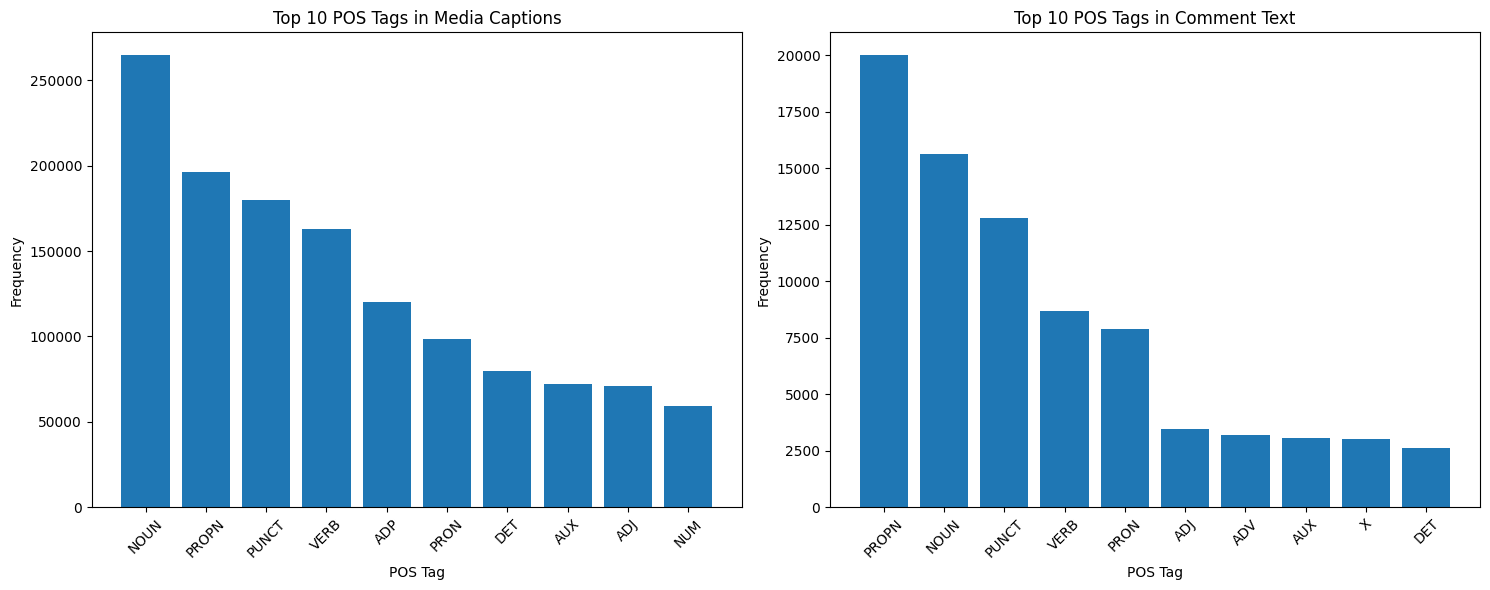


Total unique POS tags in media captions: 17
Total unique POS tags in comment text: 17
Total tokens processed in media captions: 1442589
Total tokens processed in comment text: 89815


In [50]:
# Visualize POS tag distribution
import matplotlib.pyplot as plt

# Create subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Media caption POS tags (top 10)
media_top10 = dict(media_caption_pos_summary.most_common(10))
ax1.bar(media_top10.keys(), media_top10.values())
ax1.set_title('Top 10 POS Tags in Media Captions')
ax1.set_xlabel('POS Tag')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)

# Comment text POS tags (top 10)
comment_top10 = dict(comment_text_pos_summary.most_common(10))
ax2.bar(comment_top10.keys(), comment_top10.values())
ax2.set_title('Top 10 POS Tags in Comment Text')
ax2.set_xlabel('POS Tag')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Show some interesting statistics
print(f"\nTotal unique POS tags in media captions: {len(media_caption_pos_summary)}")
print(f"Total unique POS tags in comment text: {len(comment_text_pos_summary)}")
print(f"Total tokens processed in media captions: {sum(media_caption_pos_summary.values())}")
print(f"Total tokens processed in comment text: {sum(comment_text_pos_summary.values())}")


In [51]:
# Named Entity Recognizer Function
def named_entity_recognizer(doc):
    
    words = list()
    named_entities = list()
    
    for ent in doc.ents:
        words.append(ent.text)
        named_entities.append(ent.label_)
        
    df = pd.DataFrame({"Word" : words,
                      "Named Entity" : named_entities})
    print(df)